In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_excel("Road Accident Data.xlsx")

# -------------------- DATA CLEANING --------------------
# 1. Handle missing values
df.fillna({
    'Junction_Control': 'Unknown',
    'Junction_Detail': 'Unknown',
    'Weather_Conditions': 'Unknown',
    'RoadSurface_Conditions': 'Unknown',
    'Light_Conditions': 'Unknown'
}, inplace=True)

# 2. Correct spelling errors (example from report)
df['Accident_Severity'] = df['Accident_Severity'].replace({'Fatel': 'Fatal'})

# 3. Convert date formats
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

# 4. Remove duplicates based on Accident_Index
df.drop_duplicates(subset='Accident_Index', inplace=True)

# 5. Ensure correct data types
numeric_cols = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. Extract time as hour for analysis
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour



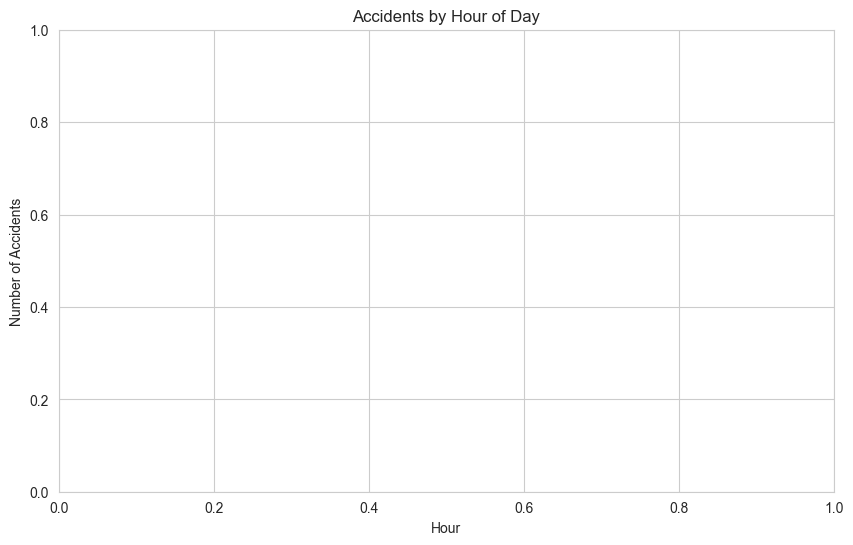

In [2]:
# -------------------- DATA VISUALIZATION --------------------
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Accident trends by time
time_counts = df['Hour'].value_counts().sort_index()
sns.lineplot(x=time_counts.index, y=time_counts.values, marker='o')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

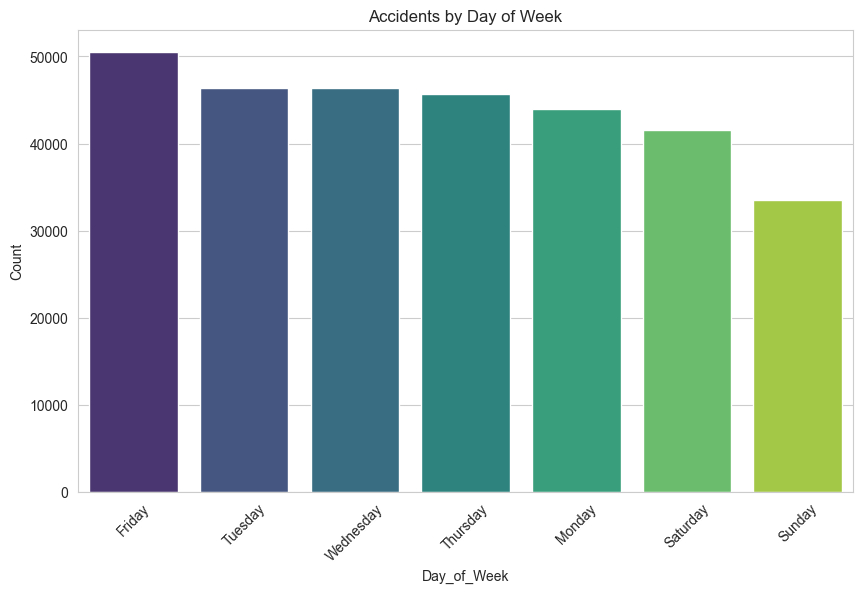

In [3]:
# 2. Accidents by day of week
day_counts = df['Day_of_Week'].value_counts()
sns.barplot(
    x=day_counts.index,
    y=day_counts.values,
    hue=day_counts.index,      # Add this line
    palette='viridis',
    legend=False               # Add this line
)
plt.title("Accidents by Day of Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

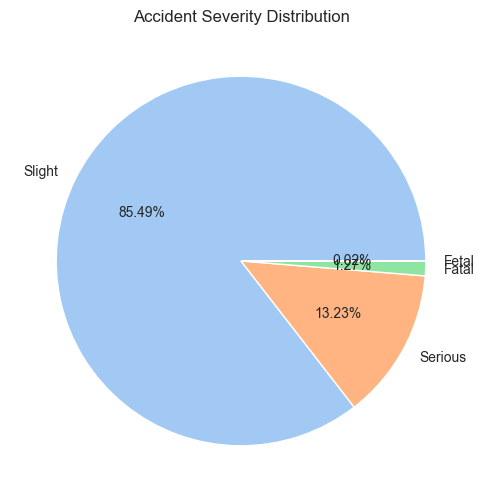

In [4]:
# 3. Accident severity distribution
severity_counts = df['Accident_Severity'].value_counts(normalize=True) * 100
severity_counts.plot.pie(autopct="%.2f%%", colors=sns.color_palette("pastel"))
plt.title("Accident Severity Distribution")
plt.ylabel("")
plt.show()

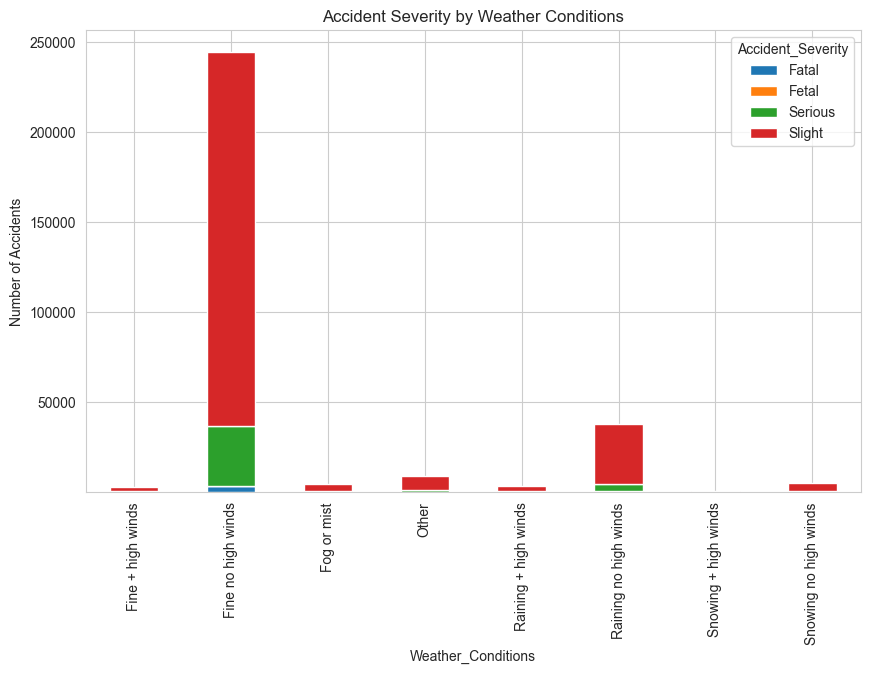


Chi-Square Test of Independence (Weather vs Severity)
Chi-Square Statistic: 436.3278
p-value: 2.72881e-79
Degrees of Freedom: 21
Expected Frequencies:
Accident_Severity            Fatal      Fetal       Serious         Slight
Weather_Conditions                                                        
Fine + high winds        39.905420   0.500862    416.431051    2691.162667
Fine no high winds     3099.337877  38.900501  32342.987989  209014.773633
Fog or mist              60.631393   0.760999    632.715920    4088.891689
Other                   111.577989   1.400441   1164.366617    7524.654954
Raining + high winds     44.697113   0.561004    466.434525    3014.307358
Raining no high winds   479.689012   6.020687   5005.771090   32349.519211
Snowing + high winds      6.819923   0.085598     71.168966     459.925513
Snowing no high winds    61.341273   0.769908    640.123842    4136.764976


In [5]:

# 4. Weather vs severity
weather_severity = pd.crosstab(df['Weather_Conditions'], df['Accident_Severity'])
weather_severity.plot(kind='bar', stacked=True)
plt.title("Accident Severity by Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()


# 4.1 Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(weather_severity)
print("\nChi-Square Test of Independence (Weather vs Severity)")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.5e}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=weather_severity.index, columns=weather_severity.columns))


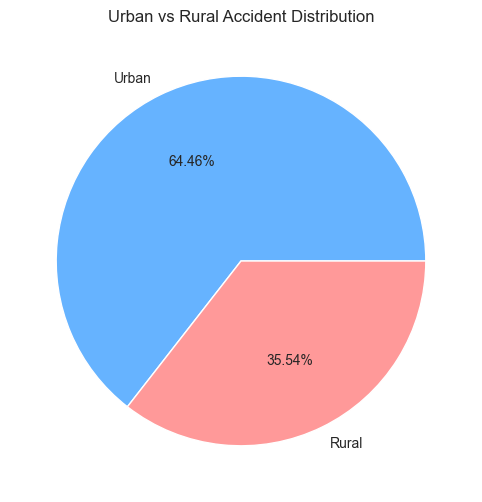

In [6]:
# 5. Urban vs Rural
urban_counts = df['Urban_or_Rural_Area'].value_counts()
urban_counts.plot.pie(autopct="%.2f%%", colors=['#66b3ff', '#ff9999'])
plt.title("Urban vs Rural Accident Distribution")
plt.ylabel("")
plt.show()


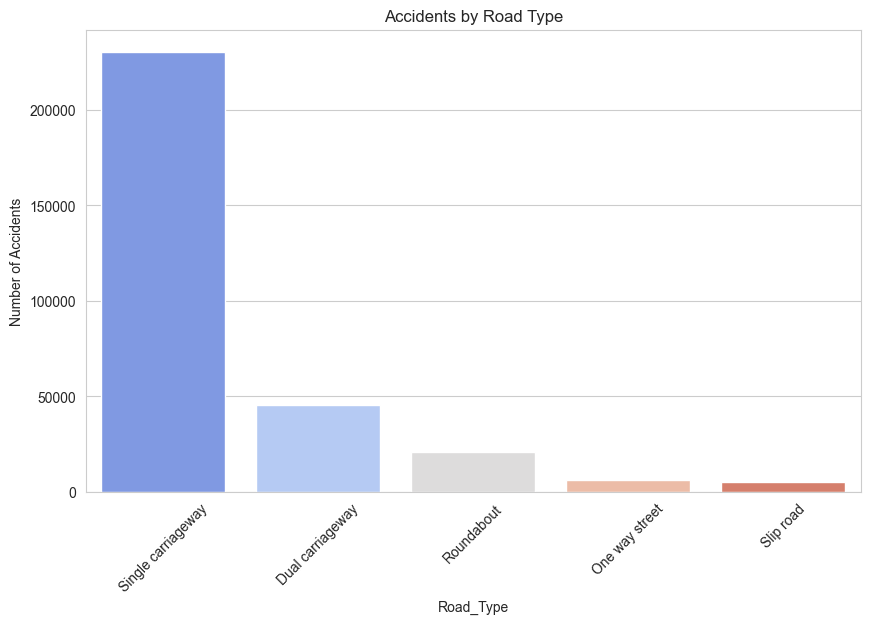

In [7]:
# 6. Road type analysis
road_counts = df['Road_Type'].value_counts()
sns.barplot(
    x=road_counts.index,
    y=road_counts.values,
    hue=road_counts.index,      # Add this line
    palette='coolwarm',
    legend=False                # Add this line
)
plt.title("Accidents by Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# 7. Vehicle type analysis
vehicle_counts = df['Vehicle_Type'].value_counts().head(10)
sns.barplot(
    x=vehicle_counts.index,
    y=vehicle_counts.values,
    hue=vehicle_counts.index,    # Add this line
    palette='muted',
    legend=False                 # Add this line
)
plt.title("Top Vehicle Types in Accidents")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 8. Junction control analysis
junction_counts = df['Junction_Control'].value_counts()
sns.barplot(x=junction_counts.index, y=junction_counts.values,hue=junction_counts.index, palette='cubehelix',legend=False )
plt.title("Accidents by Junction Control Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 9. Light conditions analysis
light_counts = pd.crosstab(df['Light_Conditions'], df['Accident_Severity'])
light_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Accident Severity by Light Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()